In [1]:
import numpy as np

from PIL import Image
image = Image.open('5x5.png')
image.show()

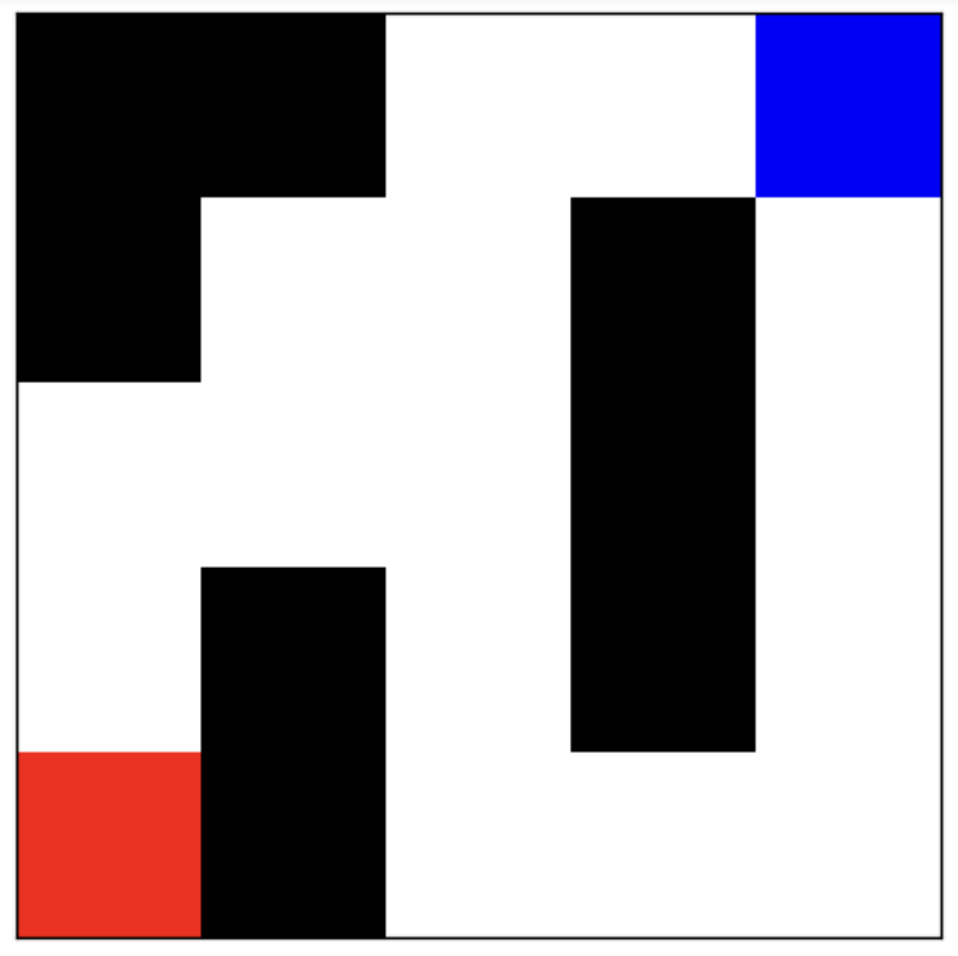

In [ ]:
image

In [ ]:
maze = ([0,0,1,1,2],
        [0,1,1,0,1],
        [1,1,1,0,1],
        [0,1,0,1,0],
        [2,0,1,1,1])



In [ ]:
start = maze[0][4]
end = maze[4][0]
agent = 100

{(0, 0, 0): 0, (0, 0, 1): 0, (0, 0, 2): 0, (0, 0, 3): 0, (0, 1, 0): 0, (0, 1, 1): 0, (0, 1, 2): 0, (0, 1, 3): 0, (0, 2, 0): 0, (0, 2, 1): 0, (0, 2, 2): 0, (0, 2, 3): 0, (0, 3, 0): 0, (0, 3, 1): 0, (0, 3, 2): 0, (0, 3, 3): 0, (0, 4, 0): 0, (0, 4, 1): 0, (0, 4, 2): 0, (0, 4, 3): 0, (1, 0, 0): 0, (1, 0, 1): 0, (1, 0, 2): 0, (1, 0, 3): 0, (1, 1, 0): 0, (1, 1, 1): 0, (1, 1, 2): 0, (1, 1, 3): 0, (1, 2, 0): 0, (1, 2, 1): 0, (1, 2, 2): 0, (1, 2, 3): 0, (1, 3, 0): 0, (1, 3, 1): 0, (1, 3, 2): 0, (1, 3, 3): 0, (1, 4, 0): 0, (1, 4, 1): 0, (1, 4, 2): 0, (1, 4, 3): 0, (2, 0, 0): 0, (2, 0, 1): 0, (2, 0, 2): 0, (2, 0, 3): 0, (2, 1, 0): 0, (2, 1, 1): 0, (2, 1, 2): 0, (2, 1, 3): 0, (2, 2, 0): 0, (2, 2, 1): 0, (2, 2, 2): 0, (2, 2, 3): 0, (2, 3, 0): 0, (2, 3, 1): 0, (2, 3, 2): 0, (2, 3, 3): 0, (2, 4, 0): 0, (2, 4, 1): 0, (2, 4, 2): 0, (2, 4, 3): 0, (3, 0, 0): 0, (3, 0, 1): 0, (3, 0, 2): 0, (3, 0, 3): 0, (3, 1, 0): 0, (3, 1, 1): 0, (3, 1, 2): 0, (3, 1, 3): 0, (3, 2, 0): 0, (3, 2, 1): 0, (3, 2, 2): 0, (3, 2

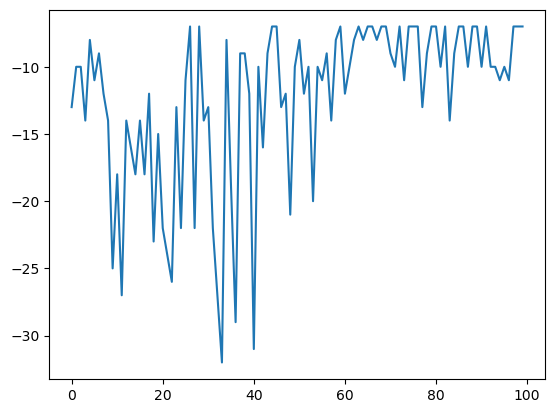

-----------------------------------------------
| 0      | -5     | -4.154 | -4.738 | -5.264 | 
-----------------------------------------------
| -5     | -2.784 | -3.505 | -5     | -4.963 | 
-----------------------------------------------
| -1.091 | -1.982 | -2.784 | -5     | -4.688 | 
-----------------------------------------------
| -0.1   | -5     | -3.408 | -5     | -4.526 | 
-----------------------------------------------
| 1      | -5     | -3.698 | -3.929 | -4.013 | 
-----------------------------------------------


In [25]:
import numpy as np
import random
import matplotlib.pyplot as plt



counter = 0
BOARD_ROWS = 5
BOARD_COLS = 5


START = (0,4)
WIN_STATE = (4,0)
HOLE_STATE = [(0,0),(0,1),(1,0),(1,3),(2,3),(3,1),(3,3),(4,1)]


class State:
    def __init__(self, state=START):
  
        self.state = state
        self.isEnd = False        

    def getReward(self):

        for i in HOLE_STATE:
            if self.state == i:
                return -5
        if self.state == WIN_STATE:
            return 1
        
        else:
            return -1

    def isEndFunc(self):
        
        if (self.state == WIN_STATE):
            self.isEnd = True
            
        for i in HOLE_STATE:
            if self.state == i:
                self.isEnd = True

    def nxtPosition(self, action):     
        
        if action == 0:                
            nxtState = (self.state[0] - 1, self.state[1]) #up             
        elif action == 1:
            nxtState = (self.state[0] + 1, self.state[1]) #down
        elif action == 2:
            nxtState = (self.state[0], self.state[1] - 1) #left
        else:
            nxtState = (self.state[0], self.state[1] + 1) #right


        
        if (nxtState[0] >= 0) and (nxtState[0] <= 4):
            if (nxtState[1] >= 0) and (nxtState[1] <= 4):    
                                    
                    return nxtState 
             
        return self.state 



          
class Agent:

    def __init__(self):
         
        self.states = []
        self.actions = [0,1,2,3]    # up, down, left, right
        self.State = State()
        
        self.alpha = 0.5
        self.gamma = 0.9
        self.epsilon = 0.1
        self.isEnd = self.State.isEnd

        
        self.plot_reward = []
        
        
        self.Q = {}
        self.new_Q = {}
        
        self.rewards = 0
        
       
        for i in range(BOARD_ROWS):
            for j in range(BOARD_COLS):
                for k in range(len(self.actions)):
                    self.Q[(i, j, k)] =0
                    self.new_Q[(i, j, k)] = 0
        
        print(self.Q)
        
    

    
    def Action(self):
        
        rnd = random.random()
        
        mx_nxt_reward =-10
        action = None
        
         
        if(rnd >self.epsilon) :
            
            for k in self.actions:
                
                i,j = self.State.state
                
                nxt_reward = self.Q[(i,j, k)]
                
                if nxt_reward >= mx_nxt_reward:
                    action = k
                    mx_nxt_reward = nxt_reward
                    
        
        else:
            action = np.random.choice(self.actions)
        
        
        position = self.State.nxtPosition(action)
        return position,action
    
    
    def Q_Learning(self,episodes):
        x = 0
        while(x < episodes):
            
            if self.isEnd:
                
                reward = self.State.getReward()
                self.rewards += reward
                self.plot_reward.append(self.rewards)
                
                
                i,j = self.State.state
                for a in self.actions:
                    self.new_Q[(i,j,a)] = round(reward,3)
                    
                
                self.State = State()
                self.isEnd = self.State.isEnd
                
                
                self.rewards = 0
                x+=1
                
            else:
                
                mx_nxt_value = -10
                
                next_state, action = self.Action()
                i,j = self.State.state
                reward = self.State.getReward()
                
                self.rewards +=reward
                
         
               
                for a in self.actions:
                    nxtStateAction = (next_state[0], next_state[1], a)
                    q_value = (1-self.alpha)*self.Q[(i,j,action)] + self.alpha*(reward + self.gamma*self.Q[nxtStateAction])
                
                    
                    if q_value >= mx_nxt_value:
                        mx_nxt_value = q_value
                
                
                self.State = State(state=next_state)
                self.State.isEndFunc()
                self.isEnd = self.State.isEnd
                
                
                self.new_Q[(i,j,action)] = round(mx_nxt_value,3)
            
          
            self.Q = self.new_Q.copy()
           
       
        print(self.Q)
        
        
        
    def plot(self,episodes):
        
        plt.plot(self.plot_reward)
        plt.show()
        
        
    #iterate through the board and find largest Q value in each, print output
    def showValues(self):
        for i in range(0, BOARD_ROWS):
            print('-----------------------------------------------')
            out = '| '
            for j in range(0, BOARD_COLS):
                mx_nxt_value = -10
                for a in self.actions:
                    nxt_value = self.Q[(i,j,a)]
                    if nxt_value >= mx_nxt_value:
                        mx_nxt_value = nxt_value
                out += str(mx_nxt_value).ljust(6) + ' | '
            print(out)
        print('-----------------------------------------------')
        
    
        
if __name__ == "__main__":

    ag = Agent()
    episodes = 100
    ag.Q_Learning(episodes)
    ag.plot(episodes)
    ag.showValues()

In [ ]:
# https://github.com/ronanmmurphy/Q-Learning-Algorithm/blob/main/Q-Learning%20Algorithm.py

((0, 4), 0)

{(0, 0, 0): 0, (0, 0, 1): 0, (0, 0, 2): 0, (0, 0, 3): 0, (0, 1, 0): 0, (0, 1, 1): 0, (0, 1, 2): 0, (0, 1, 3): 0, (0, 2, 0): 0, (0, 2, 1): 0, (0, 2, 2): 0, (0, 2, 3): 0, (0, 3, 0): 0, (0, 3, 1): 0, (0, 3, 2): 0, (0, 3, 3): 0, (0, 4, 0): 0, (0, 4, 1): 0, (0, 4, 2): 0, (0, 4, 3): 0, (1, 0, 0): 0, (1, 0, 1): 0, (1, 0, 2): 0, (1, 0, 3): 0, (1, 1, 0): 0, (1, 1, 1): 0, (1, 1, 2): 0, (1, 1, 3): 0, (1, 2, 0): 0, (1, 2, 1): 0, (1, 2, 2): 0, (1, 2, 3): 0, (1, 3, 0): 0, (1, 3, 1): 0, (1, 3, 2): 0, (1, 3, 3): 0, (1, 4, 0): 0, (1, 4, 1): 0, (1, 4, 2): 0, (1, 4, 3): 0, (2, 0, 0): 0, (2, 0, 1): 0, (2, 0, 2): 0, (2, 0, 3): 0, (2, 1, 0): 0, (2, 1, 1): 0, (2, 1, 2): 0, (2, 1, 3): 0, (2, 2, 0): 0, (2, 2, 1): 0, (2, 2, 2): 0, (2, 2, 3): 0, (2, 3, 0): 0, (2, 3, 1): 0, (2, 3, 2): 0, (2, 3, 3): 0, (2, 4, 0): 0, (2, 4, 1): 0, (2, 4, 2): 0, (2, 4, 3): 0, (3, 0, 0): 0, (3, 0, 1): 0, (3, 0, 2): 0, (3, 0, 3): 0, (3, 1, 0): 0, (3, 1, 1): 0, (3, 1, 2): 0, (3, 1, 3): 0, (3, 2, 0): 0, (3, 2, 1): 0, (3, 2, 2): 0, (3, 2

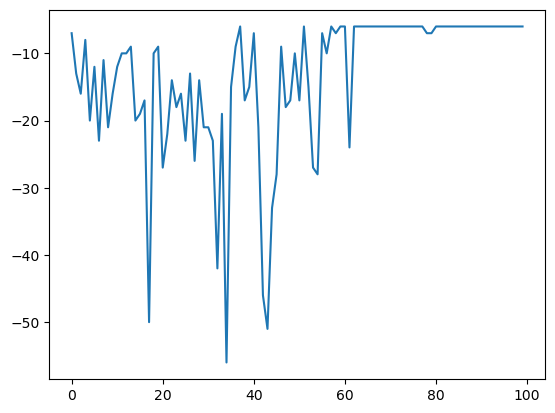

-----------------------------------------------
| -4.125 | -4.013 | -5     | -5     | -5.499 | 
-----------------------------------------------
| -5     | -4.055 | -4.303 | -4.688 | -5.148 | 
-----------------------------------------------
| -3.908 | -3.803 | -5     | -4.875 | -5.074 | 
-----------------------------------------------
| -3.698 | -3.539 | -5     | -4.917 | -5.012 | 
-----------------------------------------------
| -5     | -3.017 | -5     | -5     | -4.866 | 
-----------------------------------------------
| 0      | 0      | 0      | 0      | 0      | 
-----------------------------------------------
| 0      | 0      | 0      | 0      | 0      | 
-----------------------------------------------
| 0      | 0      | 0      | 0      | 0      | 
-----------------------------------------------
| 0      | 0      | 0      | 0      | 0      | 
-----------------------------------------------
| 0      | 0      | 0      | 0      | 0      | 
----------------------------------------

In [23]:
import numpy as np
import random
import matplotlib.pyplot as plt



counter = 0
BOARD_ROWS = 10
BOARD_COLS = 5


START = (0,4)
WIN_STATE = (9,4)
HOLE_STATE = [(0,2),(0,3),(1,0),(2,2),(3,2),(4,0),(4,2),(4,3),(5,0),(5,2),(6,2),(7,0),(7,2),(8,0),(8,2),(8,3),(9,0)]


class State:
    def __init__(self, state=START):
  
        self.state = state
        self.isEnd = False        

    def getReward(self):

        for i in HOLE_STATE:
            if self.state == i:
                return -5
        if self.state == WIN_STATE:
            return 100
        
        else:
            return -1

    def isEndFunc(self):
        
        if (self.state == WIN_STATE):
            self.isEnd = True
            
        for i in HOLE_STATE:
            if self.state == i:
                self.isEnd = True

    def nxtPosition(self, action):     
        
        if action == 0:                
            nxtState = (self.state[0] - 1, self.state[1]) #up             
        elif action == 1:
            nxtState = (self.state[0] + 1, self.state[1]) #down
        elif action == 2:
            nxtState = (self.state[0], self.state[1] - 1) #left
        else:
            nxtState = (self.state[0], self.state[1] + 1) #right


        
        if (nxtState[0] >= 0) and (nxtState[0] <= 4):
            if (nxtState[1] >= 0) and (nxtState[1] <= 4):    
                if (nxtState[2] >= 0) and (nxtState[1] <= 4):                    
                    return nxtState 
             
        return self.state 



          
class Agent:

    def __init__(self):
         
        self.states = []
        self.actions = [0,1,2,3]    # up, down, left, right
        self.State = State()
        
        self.alpha = 0.5
        self.gamma = 0.9
        self.epsilon = 0.1
        self.isEnd = self.State.isEnd

        
        self.plot_reward = []
        
        
        self.Q = {}
        self.new_Q = {}
        
        self.rewards = 0
        
       
        for i in range(BOARD_ROWS):
            for j in range(BOARD_COLS):
                for k in range(len(self.actions)):
                    self.Q[(i, j, k)] =0
                    self.new_Q[(i, j, k)] = 0
        
        print(self.Q)
        
    

    
    def Action(self):
        
        rnd = random.random()
        
        mx_nxt_reward =-10
        action = None
        
         
        if(rnd > self.epsilon) :
            
            for k in self.actions:
                
                i,j = self.State.state
                
                nxt_reward = self.Q[(i,j, k)]
                
                if nxt_reward >= mx_nxt_reward:
                    action = k
                    mx_nxt_reward = nxt_reward
                    
        
        else:
            action = np.random.choice(self.actions)
        
        
        position = self.State.nxtPosition(action)
        return position,action
    
    
    def Q_Learning(self,episodes):
        x = 0
        while(x < episodes):
            
            if self.isEnd:
                
                reward = self.State.getReward()
                self.rewards += reward
                self.plot_reward.append(self.rewards)
                
                
                i,j = self.State.state
                for a in self.actions:
                    self.new_Q[(i,j,a)] = round(reward,3)
                    
                
                self.State = State()
                self.isEnd = self.State.isEnd
                
                
                self.rewards = 0
                x+=1
                
            else:
                
                mx_nxt_value = -10
                
                next_state, action = self.Action()
                i,j = self.State.state
                reward = self.State.getReward()
                
                self.rewards +=reward
                
         
               
                for a in self.actions:
                    nxtStateAction = (next_state[0], next_state[1], a)
                    q_value = (1-self.alpha)*self.Q[(i,j,action)] + self.alpha*(reward + self.gamma*self.Q[nxtStateAction])
                
                    
                    if q_value >= mx_nxt_value:
                        mx_nxt_value = q_value
                
                
                self.State = State(state=next_state)
                self.State.isEndFunc()
                self.isEnd = self.State.isEnd
                
                
                self.new_Q[(i,j,action)] = round(mx_nxt_value,3)
            
          
            self.Q = self.new_Q.copy()
           
       
        print(self.Q)
        
        
        
    def plot(self,episodes):
        
        plt.plot(self.plot_reward)
        plt.show()
        
        
    #iterate through the board and find largest Q value in each, print output
    def showValues(self):
        for i in range(0, BOARD_ROWS):
            print('-----------------------------------------------')
            out = '| '
            for j in range(0, BOARD_COLS):
                mx_nxt_value = -10
                for a in self.actions:
                    nxt_value = self.Q[(i,j,a)]
                    if nxt_value >= mx_nxt_value:
                        mx_nxt_value = nxt_value
                out += str(mx_nxt_value).ljust(6) + ' | '
            print(out)
        print('-----------------------------------------------')
        
    
        
if __name__ == "__main__":

    ag = Agent()
    episodes = 100
    ag.Q_Learning(episodes)
    ag.plot(episodes)
    ag.showValues()